<a href="https://colab.research.google.com/github/MrFluorine/GNR650/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download and Imports


In [1]:
!pip install vit-keras

!pip install tensorflow-addons==0.16.1

!pip install tensorflow-hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.


In [2]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from vit_keras import vit, utils, visualize

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.13.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


## Loading and preprocessing data

In [3]:
import tensorflow_datasets as tfds

# Load the EuroSAT dataset
ds, ds_info = tfds.load('eurosat/rgb', split='train', with_info=True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/eurosat/rgb/2.0.0.incompleteCY39MV/eurosat-train.tfrecord*...:   0%|      …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


In [4]:
images = []
labels = []
for image, label in ds:
    images.append(image.numpy())  # Convert the TensorFlow tensor to NumPy
    labels.append(label.numpy())  # Convert the TensorFlow tensor to NumPy


In [5]:
images = np.array(images)
labels = np.array(labels)
labels = to_categorical(labels, num_classes=10)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.15, random_state=42)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


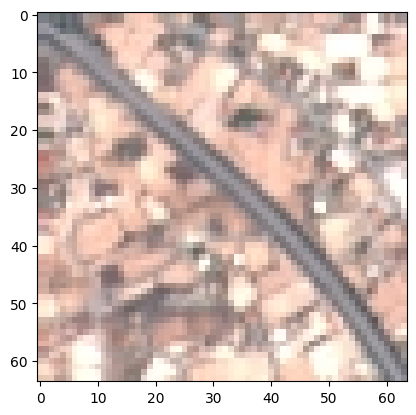

In [6]:
plt.imshow(X_train[5])
print(y_train[5])

## MODELS_1 : Fine tune of final layer

In [7]:
# Load the pre-trained ViT model
vit_model = vit.vit_b16(
        image_size = 64,
        activation = "softmax",
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 10)

# Fine-tune the final layer only
for layer in vit_model.layers[:-1]:
    layer.trainable = False


model = keras.Sequential([
    vit_model,
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



347502902/347502902 [==============================] - 21s 0us/step


/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85660416  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 10)                7690      
                                                                 
Total params: 85668106 (326.80 MB)
Trainable params: 7690 (30.04 KB)
Non-trainable params: 85660416 (326.77 MB)
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, epochs=25, batch_size = 128, validation_split=0.1)

Epoch 1/25
162/162 [==============================] - 55s 221ms/step - loss: 1.4971 - accuracy: 0.4570 - val_loss: 1.1571 - val_accuracy: 0.5961
Epoch 2/25
162/162 [==============================] - 31s 190ms/step - loss: 1.1334 - accuracy: 0.5973 - val_loss: 1.0363 - val_accuracy: 0.6349
Epoch 3/25
162/162 [==============================] - 33s 202ms/step - loss: 1.0331 - accuracy: 0.6315 - val_loss: 0.9719 - val_accuracy: 0.6627
Epoch 4/25
162/162 [==============================] - 30s 187ms/step - loss: 0.9744 - accuracy: 0.6549 - val_loss: 0.9185 - val_accuracy: 0.6832
Epoch 5/25
162/162 [==============================] - 33s 204ms/step - loss: 0.9428 - accuracy: 0.6672 - val_loss: 0.8989 - val_accuracy: 0.6863
Epoch 6/25
162/162 [==============================] - 30s 187ms/step - loss: 0.9157 - accuracy: 0.6766 - val_loss: 0.8915 - val_accuracy: 0.6837
Epoch 7/25
162/162 [==============================] - 33s 202ms/step - loss: 0.8945 - accuracy: 0.6814 - val_loss: 0.8573 - val_ac

In [10]:
results_1 = model.evaluate(X_test, y_test, batch_size = 32)

127/127 [==============================] - 7s 56ms/step - loss: 0.7363 - accuracy: 0.7437


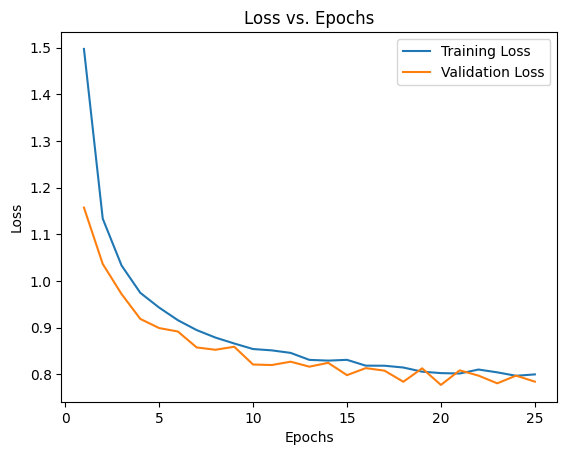

In [13]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [14]:
model.save("model1.h")

Visualizing Attention Maps

1/1 [==============================] - 4s 4s/step


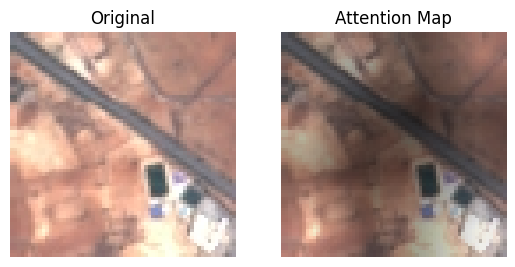

In [53]:
image = X_train[6]
model_1 = vit_model = vit.vit_b16(
        image_size = 64,
        activation = "softmax",
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 10)
attention_map = visualize.attention_map(model=model_1, image=image)
# Plot results
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

## MODEL_2: Finetune the bottom layers

In [19]:
from tensorflow.python.data.ops.options import model_pb2
# Load the pre-trained ViT model
model2= vit.vit_b16(
        image_size = 64,
        activation='softmax',
        pretrained = True,
        include_top = True,
        pretrained_top = False,
        classes = 10)

# Fine-tune the bottom layers only
for layer in model2.layers[5:]:
    layer.trainable = False
for layer in model2.layers[:5]:
    layer.trainable = True
model2.layers[-1].trainable = True

model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model2.summary()

/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(


Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 embedding (Conv2D)          (None, 4, 4, 768)         590592    
                                                                 
 reshape_1 (Reshape)         (None, 16, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 17, 768)           768       
                                                                 
 Transformer/posembed_input  (None, 17, 768)           13056     
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 17, 768),         7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [20]:
model2.layers[-1].trainable

True

In [21]:
history2 = model2.fit(X_train, y_train, epochs=25, batch_size = 128, validation_split=0.1)

Epoch 1/25
162/162 [==============================] - 78s 385ms/step - loss: 2.1406 - accuracy: 0.1950 - val_loss: 1.8268 - val_accuracy: 0.3133
Epoch 2/25
162/162 [==============================] - 59s 364ms/step - loss: 1.7538 - accuracy: 0.3187 - val_loss: 1.6416 - val_accuracy: 0.3887
Epoch 3/25
162/162 [==============================] - 59s 363ms/step - loss: 1.4623 - accuracy: 0.4724 - val_loss: 1.2986 - val_accuracy: 0.5664
Epoch 4/25
162/162 [==============================] - 61s 379ms/step - loss: 1.2818 - accuracy: 0.5370 - val_loss: 1.2606 - val_accuracy: 0.5325
Epoch 5/25
162/162 [==============================] - 61s 378ms/step - loss: 1.1993 - accuracy: 0.5713 - val_loss: 1.1780 - val_accuracy: 0.5878
Epoch 6/25
162/162 [==============================] - 61s 378ms/step - loss: 1.1265 - accuracy: 0.5940 - val_loss: 1.2086 - val_accuracy: 0.5664
Epoch 7/25
162/162 [==============================] - 61s 377ms/step - loss: 1.1007 - accuracy: 0.6060 - val_loss: 1.0859 - val_ac

In [23]:
results_ = model.evaluate(X_test, y_test, batch_size = 32)

127/127 [==============================] - 7s 54ms/step - loss: 0.7363 - accuracy: 0.7437


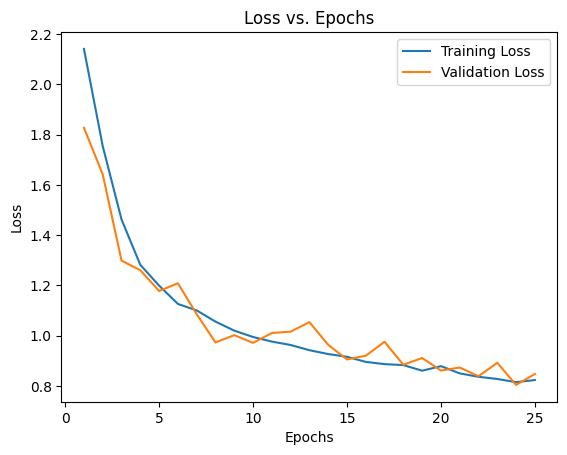

In [22]:
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [24]:
model2.save("model2.h")

**Visualizing Attention Maps**


1/1 [==============================] - 2s 2s/step


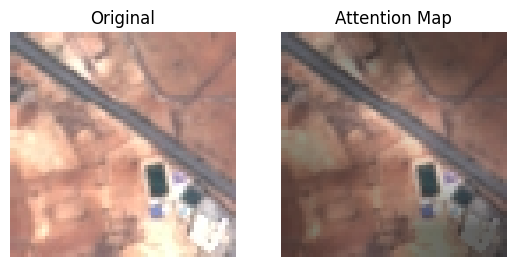

In [41]:
image = X_train[6]
model_2 = tf.keras.models.load_model("model2.h/")
attention_map = visualize.attention_map(model=model_2, image=image)
# Plot results
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

## MODEL3: Full fine tune

In [25]:
from tensorflow.python.data.ops.options import model_pb2
# Load the pre-trained ViT model
model3= vit.vit_b16(
        image_size = 64,
        pretrained = True,
        activation = "softmax",
        include_top = True,
        pretrained_top = False,
        classes = 10)

for layer in model3.layers:
    layer.trainable = True


model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(


In [26]:
model3.summary()

Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 embedding (Conv2D)          (None, 4, 4, 768)         590592    
                                                                 
 reshape_2 (Reshape)         (None, 16, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 17, 768)           768       
                                                                 
 Transformer/posembed_input  (None, 17, 768)           13056     
  (AddPositionEmbs)                                              
                                                                 
 Transformer/encoderblock_0  ((None, 17, 768),         7087872   
  (TransformerBlock)          (None, 12, None, None)       

In [27]:
history3 = model3.fit(X_train, y_train, epochs=25, batch_size = 128, validation_split=0.1)

Epoch 1/25
162/162 [==============================] - 134s 491ms/step - loss: 1.9262 - accuracy: 0.2837 - val_loss: 1.4766 - val_accuracy: 0.4558
Epoch 2/25
162/162 [==============================] - 76s 469ms/step - loss: 1.2231 - accuracy: 0.5567 - val_loss: 1.0820 - val_accuracy: 0.6100
Epoch 3/25
162/162 [==============================] - 78s 484ms/step - loss: 0.9462 - accuracy: 0.6609 - val_loss: 0.8706 - val_accuracy: 0.6993
Epoch 4/25
162/162 [==============================] - 78s 484ms/step - loss: 0.8072 - accuracy: 0.7132 - val_loss: 0.8905 - val_accuracy: 0.6763
Epoch 5/25
162/162 [==============================] - 79s 484ms/step - loss: 0.6725 - accuracy: 0.7603 - val_loss: 0.7755 - val_accuracy: 0.7394
Epoch 6/25
162/162 [==============================] - 78s 484ms/step - loss: 0.6041 - accuracy: 0.7852 - val_loss: 0.8370 - val_accuracy: 0.7037
Epoch 7/25
162/162 [==============================] - 78s 484ms/step - loss: 0.5652 - accuracy: 0.7988 - val_loss: 0.6125 - val_a

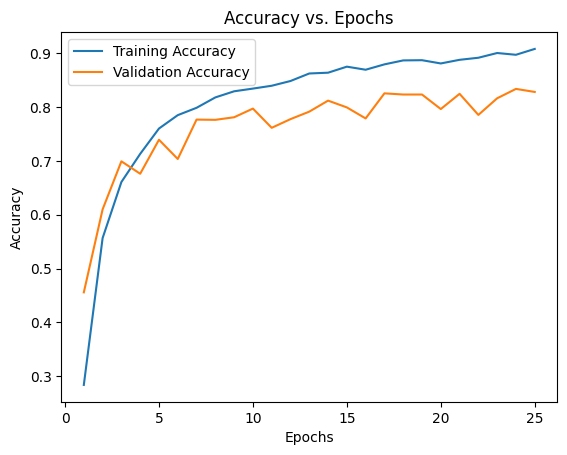

In [34]:
training_accuracy = history3.history['accuracy']
validation_accuracy = history3.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

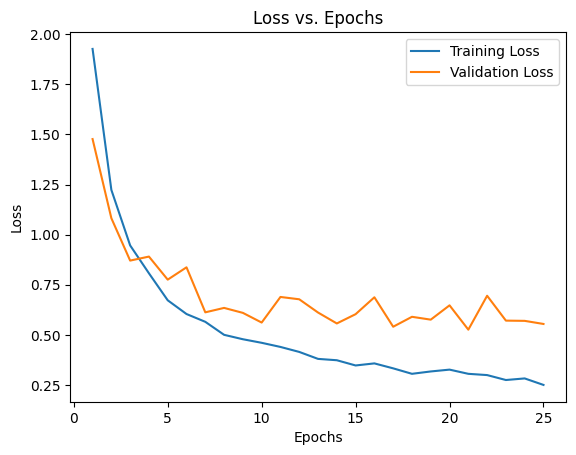

In [35]:
training_loss = history3.history['loss']
validation_loss = history3.history['val_loss']
epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [36]:
model3.save("model3.h")

Visualizing Attention Maps

1/1 [==============================] - 3s 3s/step


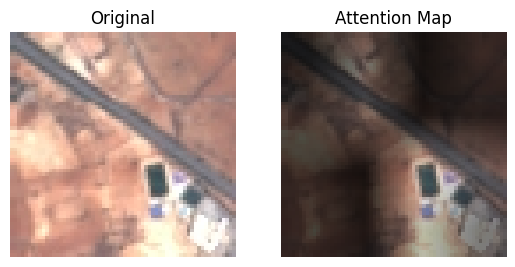

In [46]:
image = X_train[6]
model_3 = tf.keras.models.load_model("model3.h/")
attention_map = visualize.attention_map(model=model_3, image=image)
# Plot results
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

## Model4: Do Not Fine Tune

In [50]:
model4= vit.vit_b16(
        image_size = 64,
        pretrained = True,
        activation = "softmax",
        include_top = True,
        pretrained_top = True,
        classes = 10)

model4.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

Visualizing Attention Maps

/usr/local/lib/python3.10/dist-packages/vit_keras/vit.py:139: UserWarning: Can only use pretrained_top with imagenet21k+imagenet2012 if classes = 1000. Setting manually.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(


1/1 [==============================] - 3s 3s/step


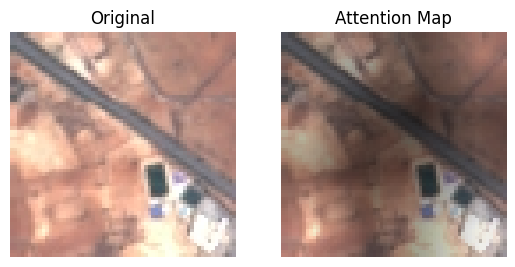

In [52]:
image = X_train[6]
model_4 = vit.vit_b16(
        image_size = 64,
        pretrained = True,
        activation = "softmax",
        include_top = True,
        pretrained_top = True,
        classes = 10)
attention_map = visualize.attention_map(model=model_4, image=image)
# Plot results
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

# Comparision of attention maps

1. The attention map for model1 and model4 will be same because we are not
training the attention , so it will be default attention traind on imagenet dataset
2. The attention map is best in model 3 because it is fully trained on our data set

In [60]:
def attention_map_comp(image):
  model_1 =  vit.vit_b16(
          image_size = 64,
          activation = "softmax",
          pretrained = True,
          include_top = False,
          pretrained_top = False,
          classes = 10)
  model_2 = tf.keras.models.load_model("model2.h/")


  model_3 = tf.keras.models.load_model("model3.h/")

  model_4 = vit.vit_b16(
          image_size = 64,
          pretrained = True,
          activation = "softmax",
          include_top = True,
          pretrained_top = True,
          classes = 10)
  attention_map_1 = visualize.attention_map(model=model_1, image=image)
  attention_map_2 = visualize.attention_map(model=model_2, image=image)
  attention_map_3 = visualize.attention_map(model=model_3, image=image)
  attention_map_4 = visualize.attention_map(model=model_4, image=image)
  # Plot results
  fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)
  ax1.axis('off')
  ax2.axis('off')
  ax3.axis('off')
  ax4.axis('off')
  ax5.axis('off')
  ax1.set_title('Original')
  ax2.set_title(' model 1')
  ax3.set_title(' model 2')
  ax4.set_title(' model 3')
  ax5.set_title(' model 4')
  _ = ax1.imshow(image)
  _ = ax2.imshow(attention_map_1)
  _ = ax3.imshow(attention_map_2)
  _ = ax4.imshow(attention_map_3)
  _ = ax5.imshow(attention_map_4)

/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/vit_keras/vit.py:139: UserWarning: Can only use pretrained_top with imagenet21k+imagenet2012 if classes = 1000. Setting manually.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(


1/1 [==============================] - 2s 2s/step


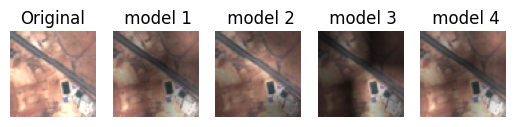

In [61]:
attention_map_comp(X_train[6])

/usr/local/lib/python3.10/dist-packages/vit_keras/vit.py:139: UserWarning: Can only use pretrained_top with imagenet21k+imagenet2012 if classes = 1000. Setting manually.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(


1/1 [==============================] - 3s 3s/step


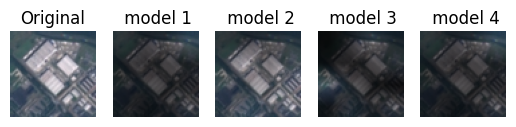

In [77]:
attention_map_comp(X_train[1111])

/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/vit_keras/vit.py:139: UserWarning: Can only use pretrained_top with imagenet21k+imagenet2012 if classes = 1000. Setting manually.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 24, 24 to 4, 4
  warnings.warn(


1/1 [==============================] - 3s 3s/step


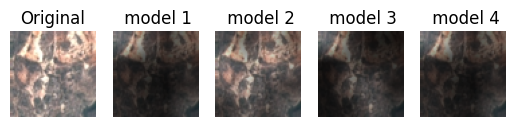

In [71]:
attention_map_comp(X_train[96])